In [5]:
import matplotlib.pyplot as plt

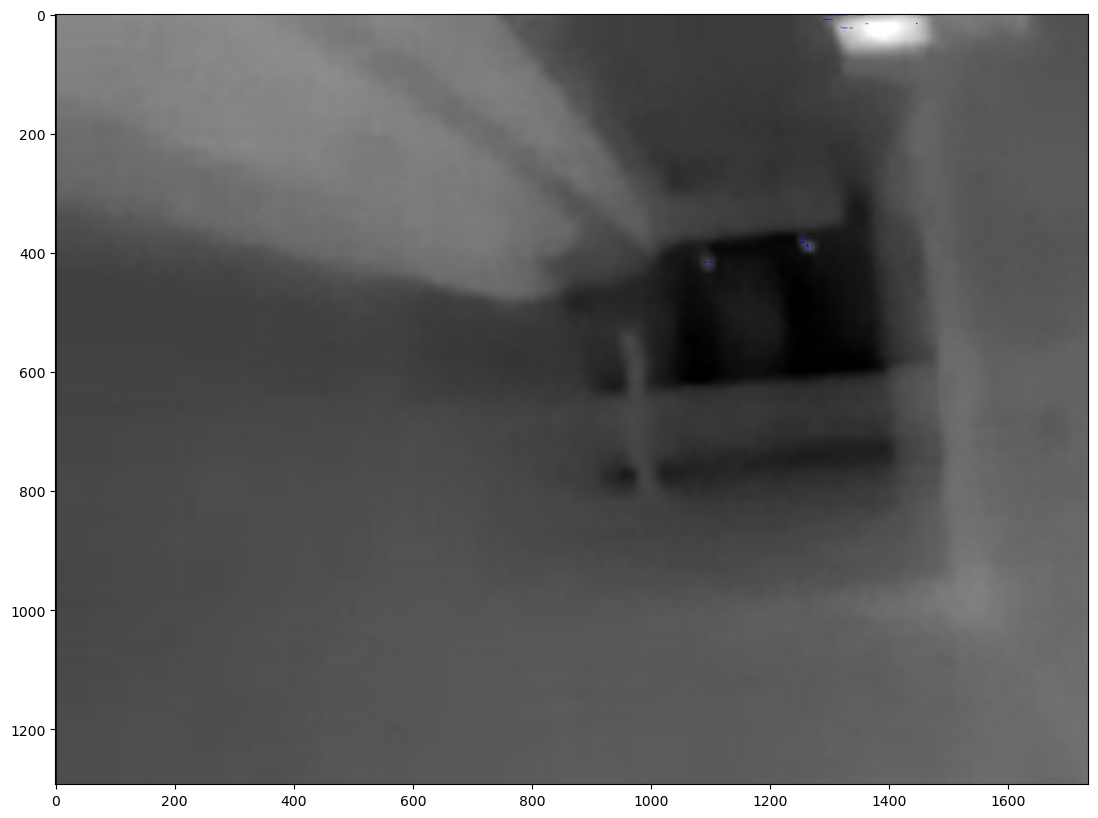

In [9]:
import cv2
import numpy as np

image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to color for visualization

# Harris corner detection
dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)

# Mark detected corners
image_color[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark corners in red

# cv2.imshow('Harris Corners', image_color)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(20, 10))
plt.imshow(image_color, cmap='gray')
plt.show()


/tmp/ipykernel_8898/2570245055.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  for corner in np.int0(corners):


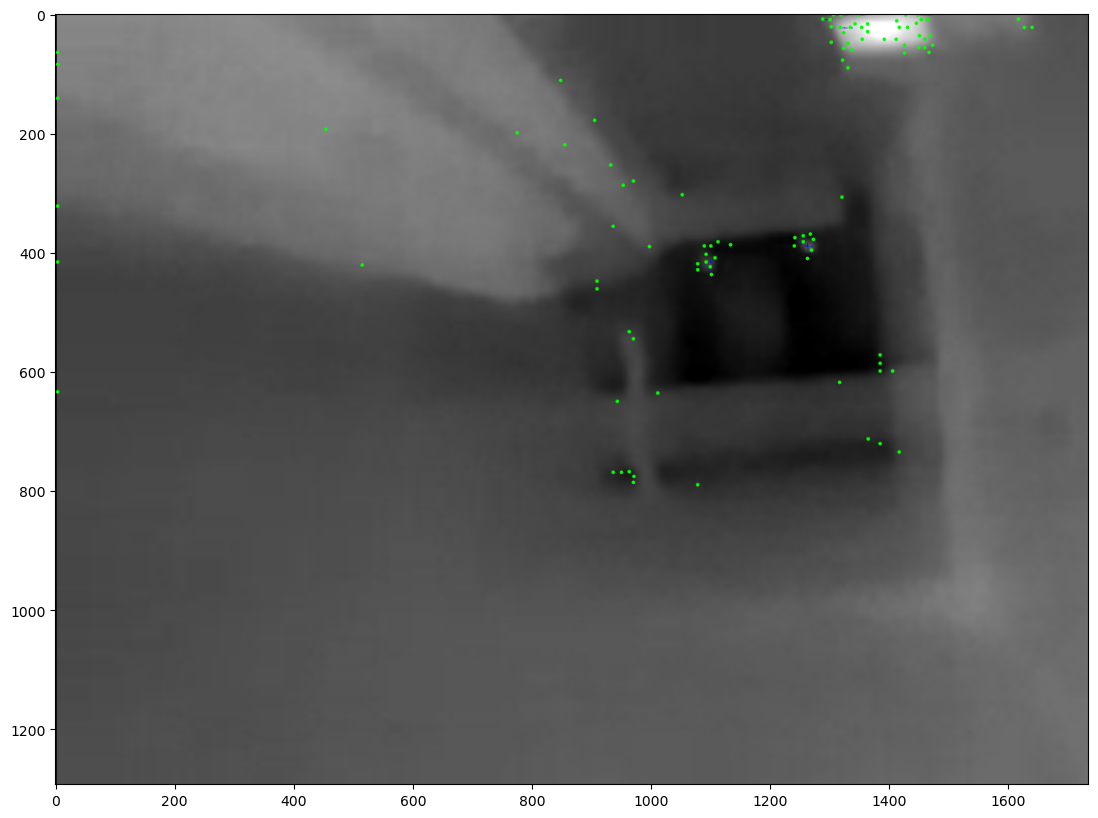

In [ ]:
corners = cv2.goodFeaturesToTrack(image, maxCorners=100, qualityLevel=0.01, minDistance=10)

for corner in np.int0(corners):
    x, y = corner.ravel()
    cv2.circle(image_color, (x, y), 3, (0, 255, 0), -1)


plt.figure(figsize=(20, 10))
plt.imshow(image_color, cmap='gray')
plt.show()


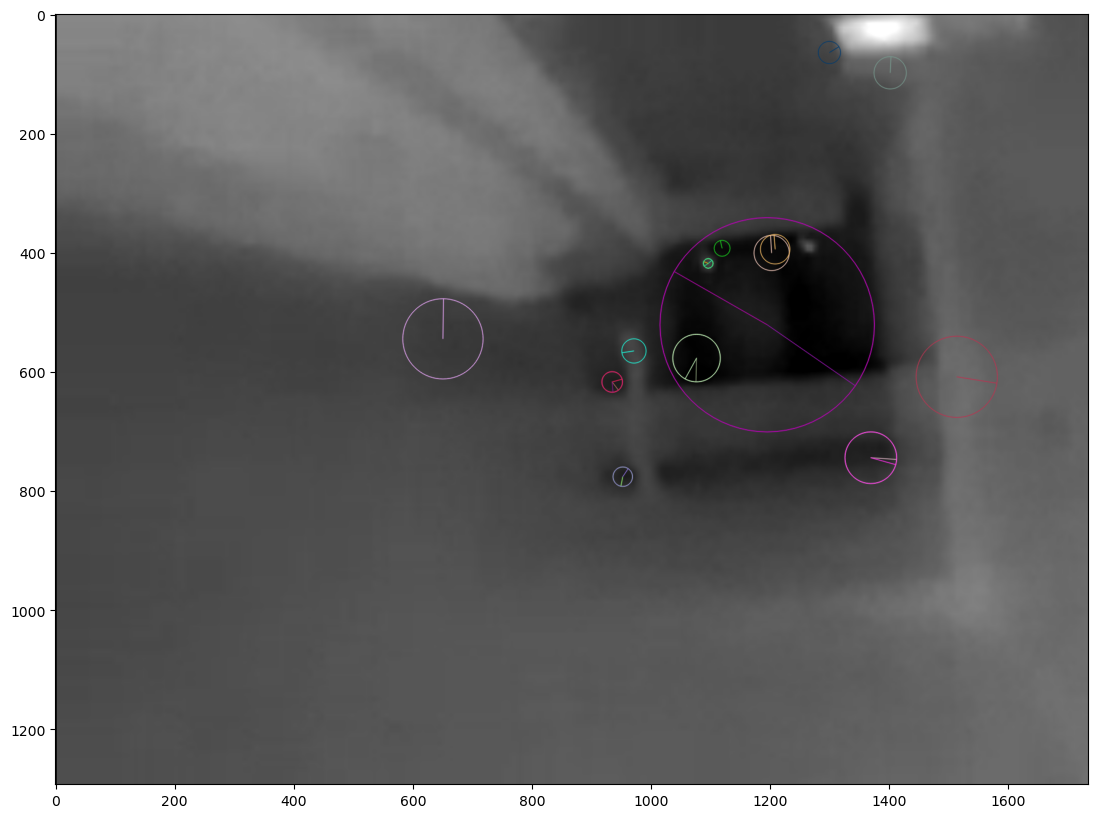

In [11]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)

image_sift = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(20, 10))
plt.imshow(image_sift, cmap='gray')
plt.show()


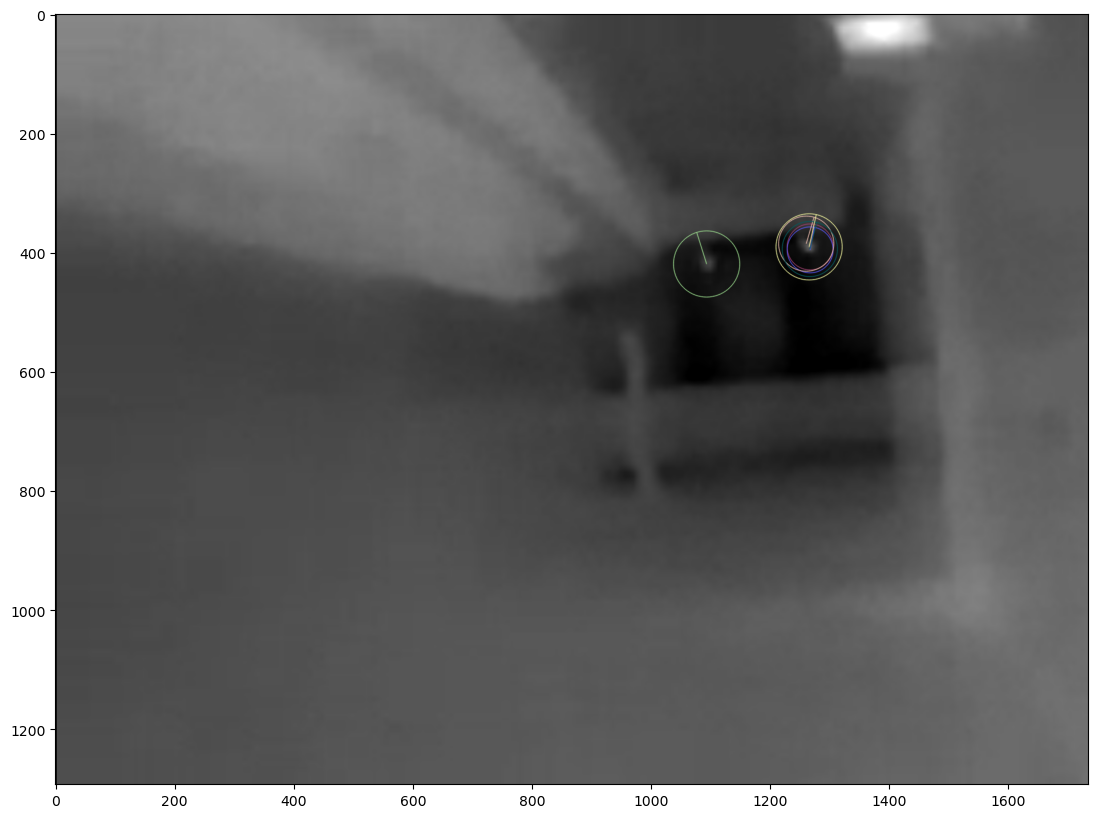

In [12]:
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)

image_orb = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(20, 10))
plt.imshow(image_orb, cmap='gray')
plt.show()


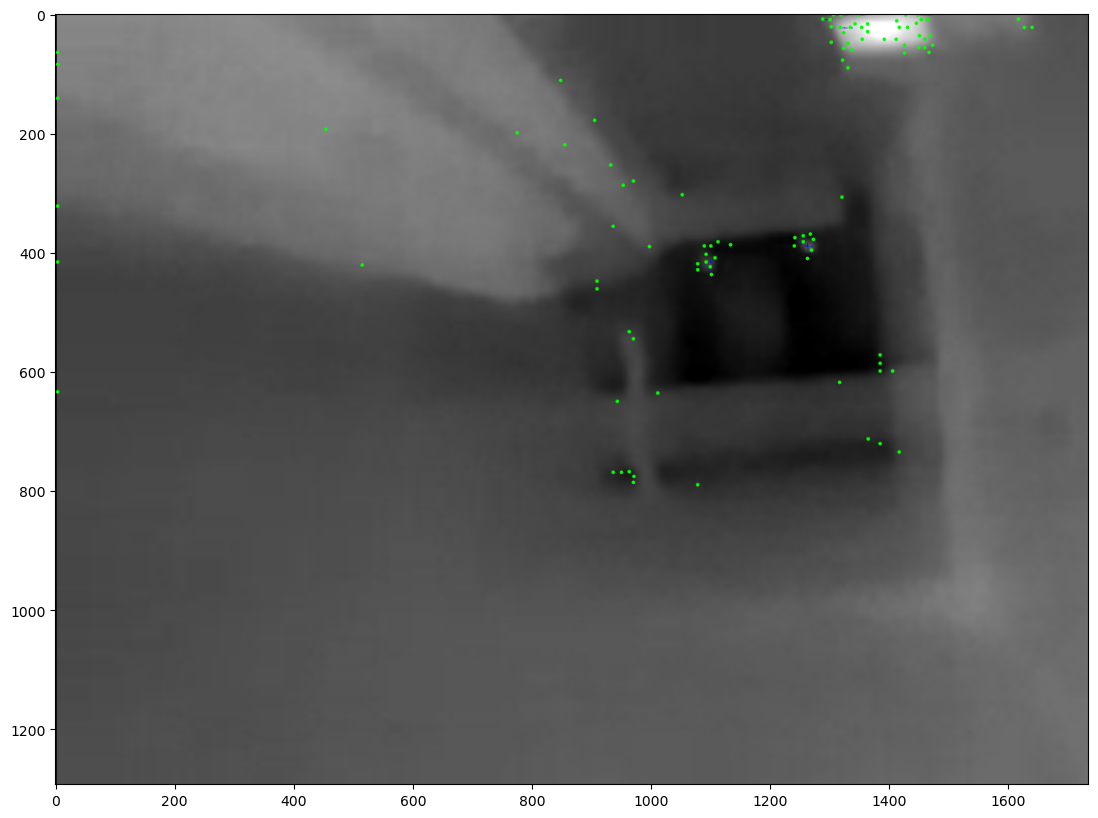

In [15]:
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(image, None)

image_fast = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))

brisk = cv2.BRISK_create()
keypoints, descriptors = brisk.detectAndCompute(image, None)

image_brisk = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

boxes, _ = hog.detectMultiScale(image, winStride=(8, 8))

for (x, y, w, h) in boxes:
    cv2.rectangle(image_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(20, 10))
plt.imshow(image_color, cmap='gray')
plt.show()



In [19]:
import torch
import torch.nn as nn

class SuperPoint(nn.Module):
    def __init__(self):
        super(SuperPoint, self).__init__()
        # You'd need to define or load the architecture here

    def forward(self, x):
        # Forward pass logic
        return {'keypoints': None, 'descriptors': None}  # Replace with actual processing

# Load the model weights manually
model = SuperPoint()
model.load_state_dict(torch.load('superpoint_v1.pth'))
model.eval()  # Set to evaluation mode

# Example image input
image = torch.rand((1, 1, 480, 640))  # Example grayscale image

# Get keypoints and descriptors
outputs = model(image)
keypoints = outputs['keypoints']
descriptors = outputs['descriptors']


/tmp/ipykernel_8898/2596237387.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('superpoint_v1.pth'))


FileNotFoundError: [Errno 2] No such file or directory: 'superpoint_v1.pth'